In [2]:
from __future__ import print_function
import keras
from keras import backend
from mnist.loader import MNIST
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from PIL import Image
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

c:\users\trusha\python\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\trusha\python\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\trusha\python\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.
c:\users\trusha\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\trusha\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\us

In [2]:
batch_size = 126

epochs = 10

# Input image dimensions
imgr, imgc = 28, 28

In [3]:
emnist= MNIST(path='Dataletters\\')
emnist.lect_emnist('letters')
a ,b = emnist_data.load_training()


In [4]:
img=a[0].reshape(28,28)

In [5]:
img.shape

(28, 28)

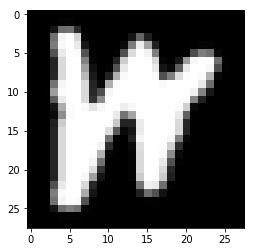

In [6]:
plt.imshow(img,cmap='gray')

In [7]:
a.shape

(124800, 784)

In [8]:
a = a.reshape(124800, 28, 28)
b = b.reshape(124800, 1)

b = b-1

In [9]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.25, random_state=111)

a_train = a_train.reshape(a_train.shape[0], img_rows, img_cols, 1)
a_test = a_test.reshape(a_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)

(28, 28, 1)


In [10]:
a_train = a_train.astype('float32')
b_test = b_test.astype('float32')


a_train /= 255
a_test /= 255

b_train = keras.utils.to_categorical(b_train, num_classes)
b_test = keras.utils.to_categorical(b_test, num_classes)


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
//model.add(Conv2D(64, (3, 3), activation='relu'))
//model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])
model.fit(a_train, b_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)


Instructions for updating:
Use tf.cast instead.
Train on 65519 samples, validate on 28081 samples
Epoch 1/10
65519/65519 [==============================] - 22s 334us/step - loss: 1.0242 - acc: 0.6904 - val_loss: 0.3812 - val_acc: 0.8761
Epoch 2/10
65519/65519 [==============================] - 10s 147us/step - loss: 0.5163 - acc: 0.8403 - val_loss: 0.2922 - val_acc: 0.9053
Epoch 3/10
65519/65519 [==============================] - 10s 147us/step - loss: 0.4206 - acc: 0.8661 - val_loss: 0.2682 - val_acc: 0.9133
Epoch 4/10
65519/65519 [==============================] - 10s 147us/step - loss: 0.3665 - acc: 0.8838 - val_loss: 0.2452 - val_acc: 0.9195
Epoch 5/10
65519/65519 [==============================] - 10s 149us/step - loss: 0.3386 - acc: 0.8928 - val_loss: 0.2310 - val_acc: 0.9246
Epoch 6/10
65519/65519 [==============================] - 10s 148us/step - loss: 0.3140 - acc: 0.8984 - val_loss: 0.2253 - val_acc: 0.9262
Epoch 7/10
65519/65519 [==============================] - 10s 149us/

In [13]:
model.save('cnn_model.h5')


In [1]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)


NameError: name 'tf' is not defined